># Introduction

>This is a Data Wrangling project which consists of twitter data that'll be gathered from multiple sources, assessed, cleaned and analyzed to be able to give insights from the final visualizations

><b>The twitter datasets that information will be gathered from for this analysis, which were provided by Udacity are the following:</b>

>- twitter-archive-enhanced
>- image prediction file from a url
> - twitter API's and JSON 

> <b>Gathering Data from csv file</b>

In [52]:
#import neccesary libraries 
import pandas as pd
import numpy as np
import tweepy 
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import json
import io
from tweepy import OAuthHandler
from timeit import default_timer as timer
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import datetime

In [53]:
#Using pandas, read the twitter archive data 
df = pd.read_csv('twitter-archive-enhanced.csv')

In [54]:
#Check twitter archive dataframe
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


><b>Gathering data from url source

In [55]:
#Download image prediction files from Udacity site
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [56]:
#Read the downloaded file into the pandas dataframe
url_data = response.content
df_image = pd.read_csv(io.StringIO(url_data.decode('utf-8')),sep = '\t')
df_image.to_csv('twitter_archive_master.csv')

In [57]:
#Check downloaded dataframe
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


><b>Gathering data from twitter API and JSON</b>

In [58]:
#Gathering data from Twiiter API's and JSON
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import pandas as pd


# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

In [59]:
#Read the data from twitter-json text file into a Datafame
df_list = []

with open('tweet-json.txt', 'r') as file:
    for text in file:
        tweet = json.loads(text)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        
        #Append to the empty list of dictionaries created above
        df_list.append({'tweet_id': tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count' : favorite_count})
        #create a pandas dataframe for readability
        df_tweets = pd.DataFrame(df_list, columns = ['tweet_id','retweet_count','favorite_count'])        

In [60]:
#Check the dataframe
df_tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


># Assess Dataframes

><b>Data assessment of twitter archive dataframe</b>

In [61]:
#Assess data from dataframe
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [62]:
#Check data from random samples to get another look at data
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1843,675853064436391936,NaN,NaN,2015-12-13 01:41:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/675853064436391936/photo/1,https://twitter.com/dog_rates/status/675853064436391936/photo/1",88,80,None,None,None,None,None
1475,693642232151285760,NaN,NaN,2016-01-31 03:49:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Freddery. He's a Westminster Toblerone. Seems to enjoy car rides. 9/10 would pat on the head approvingly https://t.co/6BS9XEip9a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693642232151285760/photo/1,9,10,Freddery,None,None,None,None
2144,669942763794931712,NaN,NaN,2015-11-26 18:16:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Andru. He made his very own lacrosse stick. Much dedication. Big dreams. Tongue slip. 11/10 go get em Andru https://t.co/1VJoY3OJ1F,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669942763794931712/photo/1,11,10,Andru,None,None,None,None
2266,667530908589760512,NaN,NaN,2015-11-20 02:32:25 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","Meet Naphaniel. He doesn't necessarily enjoy his day job, but he's damn good at it. 10/10 https://t.co/xoRWyQTcmy",NaN,NaN,NaN,https://twitter.com/dog_rates/status/667530908589760512/photo/1,10,10,Naphaniel,None,None,None,None
1924,674075285688614912,NaN,NaN,2015-12-08 03:57:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Mitch. He thinks that's a hat. Nobody has told him yet. 11/10 please no one tell him https://t.co/7jOPktauh4,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674075285688614912/photo/1,11,10,Mitch,None,None,None,None


In [63]:
#Checking for data types and amount data in the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [64]:
#Looking into the datasets numerical value
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [65]:
#Checking the amount of data that is duplicated 
sum(df['tweet_id'].duplicated())

0

In [66]:
#Checking the column names on the dataframe
list(df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [67]:
#Checking the amount in the types of dogs
df.floofer.value_counts(), df.doggo.value_counts(), df.pupper.value_counts(), df.puppo.value_counts()

(None       2346
 floofer    10  
 Name: floofer, dtype: int64,
 None     2259
 doggo    97  
 Name: doggo, dtype: int64,
 None      2099
 pupper    257 
 Name: pupper, dtype: int64,
 None     2326
 puppo    30  
 Name: puppo, dtype: int64)

In [68]:
#Checking for null values in column
df[df['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [69]:
#Checking for amount of null values in the column
sum(df['expanded_urls'].isnull())

59

In [70]:
#Looking to see the types of values in the denominator column
df.rating_denominator.sort_values(ascending= False)

1120    170
902     150
1634    130
1779    120
1635    110
       ... 
1575    10 
1576    10 
516     7  
2335    2  
313     0  
Name: rating_denominator, Length: 2356, dtype: int64

In [71]:
#Checking to see the errors for the denominators that aren't 10
test = df[(df.rating_denominator != 10)]
print(test.text)

313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                                       
342     @docmisterio account started on 11/15/15                                                                                                                                 
433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                      
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784     RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…                             
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                        

In [72]:
#Checking to see numerator values that are abnormal
np.sort(df.rating_numerator.unique())

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   17,   20,   24,   26,   27,   44,
         45,   50,   60,   75,   80,   84,   88,   99,  121,  143,  144,
        165,  182,  204,  420,  666,  960, 1776], dtype=int64)

In [73]:
#Checing to see abnormal denominator values
np.sort(df.rating_denominator.unique())

array([  0,   2,   7,  10,  11,  15,  16,  20,  40,  50,  70,  80,  90,
       110, 120, 130, 150, 170], dtype=int64)

In [74]:
#Checking whether any name faults exists
temp=df.name.value_counts(ascending=False)
print(temp)

None       745
a          55 
Charlie    12 
Lucy       11 
Cooper     11 
           .. 
Lucky      1  
Binky      1  
Fillup     1  
Rover      1  
Jarvis     1  
Name: name, Length: 957, dtype: int64


In [75]:
#Sorting names to check for errors
df['name'].sort_values(ascending = False)

1385    very 
819     very 
1097    very 
773     very 
1031    very 
        ...  
1327    Adele
1933    Acro 
938     Ace  
1021    Abby 
1035    Abby 
Name: name, Length: 2356, dtype: object

In [76]:
#Checking to see error names that need to be modified
np.sort(df.name.unique())

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn',
       'Ava', 'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo',
       'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter',
       'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo',
       'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny',
       'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson',
       'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky',
       'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz',
       'Bloo', 'Bloop',

><b>Assess image prediction dataframe</b>

In [77]:
#Check into dataframe
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [78]:
#Check data types and amount of data in columns
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [79]:
#Check if any data has been duplicated
df_image.duplicated().unique()

array([False])

><b>Assess tweets dataframe from twitter API and JSON</b>

In [80]:
#Llook into tweets dataframe
df_tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [81]:
#Check data types and amount of data in columns
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [82]:
#Check if any data in dataframe is repeated
df_tweets.duplicated().unique()

array([False])

># Problems with the data

># Quality

<b>In df</b>
- Missing data in floofer,pupper,puppo,doggo columns that have 'None' instead of Nan
- Datatype for timestamp is incorrect
- Many entries are for multiple dogs
- Some entries have tweets unrelated to dog content
- Error entries in name column are not names
- missing dog names
- expanded_urls column name unclear
- source column name unclear
- rating denominator not always = 10 
- rating numerator includes values too high and too low
- Name errors with ?question marks
- Text(<ahref=) before link on source column
- Extra last four digits on timestamp
- Unnecessary columns that won't be used for analysis

<b>In df_image</b>
- No column that mentions whether image is a dog or not


># <b>Tidiness</b>

<b>In df</b>
- Four columns for datatype to be combined into one
- All three dataframes need to be combined

># Cleaning the data

In [83]:
#Make copies of each dataframe that'll contain the cleaned data
df_clean = df.copy()
df_image_clean = df_image.copy()
df_tweets_clean = df_tweets.copy()

<b>Cleaning first dataframe - df</b>

<b>Define</b>

Cleaning rating data. Check the columns with decimals in the columns and fix them

<b>Code</b>

In [84]:
#Check rating data with decimals in the numerator
pd.set_option('display.max_colwidth', -1)
df_clean[df_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

<ipython-input-84-ee14db86f1f3>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)
C:\Users\Acer\Anaconda3\envs\my_env\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


In [85]:
#Replace the incorrect data with the right ones
df_clean.rating_numerator = df_clean.rating_numerator.replace(df_clean.rating_numerator[45], 13.5)
df_clean.rating_numerator = df_clean.rating_numerator.replace(df_clean.rating_numerator[695], 9.75)
df_clean.rating_numerator = df_clean.rating_numerator.replace(df_clean.rating_numerator[763], 11.27)
df_clean.rating_numerator = df_clean.rating_numerator.replace(df_clean.rating_numerator[1689], 9.5)
df_clean.rating_numerator = df_clean.rating_numerator.replace(df_clean.rating_numerator[1712], 11.26)

In [86]:
#Check for unusally high numerators, checking numbers above 20 as most ratings are between 10 and 18
df_num_temp = df_clean[(df_clean['rating_numerator'] >20)]
df_num_temp['text']

188     @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research                                                                                   
189     @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10                                    
290     @markhoppus 182/10                                                                                                                                                       
313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                                       
433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                      
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and 

In [87]:
#Drop rows where numerator numbers are too high
drop_numbers_list = [188,189,290,516,979,2074]
df_clean.drop(drop_numbers_list,inplace = True)

<b>Test</b>

In [88]:
#Check if rows have been dropped
df_clean.shape

(2350, 17)

<b>Define</b>

- Replace 'None' text data in doggo, floofer, pupper, puppo column to Null value 
- Put them on one column called dog_description
- Drop the doggo,pupper,floofer,puppo columns

<b>Code</b>

In [89]:
#Create list with dog types then create a for loop to change None to emptry space
list_dog_type = ['doggo', 'floofer','pupper','puppo']
for x in list_dog_type:
    df_clean[x] = df_clean[x].replace('None', '')  

In [90]:
#Combine the four columns by concatenating them
df_clean['dog_description'] = df_clean.doggo.str.cat(df_clean.floofer).str.cat(df_clean.pupper).str.cat(df_clean.puppo)

In [91]:
#Check the entries in the new column of concatenated values
df_clean.dog_description.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [92]:
#Replace the entries that have two names with 'multiple'
df_clean['dog_description'] = df_clean['dog_description'].replace('doggopuppo', 'multiple')
df_clean['dog_description'] = df_clean['dog_description'].replace('doggofloofer', 'multiple')
df_clean['dog_description'] = df_clean['dog_description'].replace('doggopupper', 'multiple')

In [93]:
#Check that the entries have been replaced 
df_clean.dog_description.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'multiple'],
      dtype=object)

In [94]:
#Replace space with Null values(Nan) 
df_clean['dog_description'] = df_clean['dog_description'].replace('',np.nan)

#drop the four columns with the dog descriptions
df_clean = df_clean.drop(columns = ['doggo','floofer','pupper','puppo'])

<b>Test</b>

In [95]:
#Check to see whether columns have been removed
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2350 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2350 non-null   int64  
 1   in_reply_to_status_id       75 non-null     float64
 2   in_reply_to_user_id         75 non-null     float64
 3   timestamp                   2350 non-null   object 
 4   source                      2350 non-null   object 
 5   text                        2350 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2294 non-null   object 
 10  rating_numerator            2350 non-null   float64
 11  rating_denominator          2350 non-null   int64  
 12  name                        2350 non-null   object 
 13  dog_description             380 n

<b>Define</b>
- Drop retweeted columns
- Change column names to clearer name
- Remove extra text and digits of timestamp and source column

<b>Code</b>

In [96]:
#Drop retweeted data becuase it won't be used for further analysis
df_clean = df_clean.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'])

In [97]:
#Renamed the column names for a clearer name
df_clean = df_clean.rename(columns= {'expanded_urls': 'tweet link',
                                    'source' : 'twitter_download_link'})

In [98]:
#Tidied up the the data by removing extra digits
cleaned_time = df_clean.timestamp.str.strip('+0000')

In [99]:
#Tidied up the source link data 
cleaned_link = df_clean.twitter_download_link.str[8:]

<b>Test</b>

In [100]:
#Columns have been renamed
list(df_clean.columns) 

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'twitter_download_link',
 'text',
 'tweet link',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_description']

In [101]:
#Time values have been tidied with extra digits removed
print(cleaned_time)

0       2017-08-01 16:23:56 
1       2017-08-01 00:17:27 
2       2017-07-31 00:18:03 
3       2017-07-30 15:58:51 
4       2017-07-29 16:00:24 
                ...         
2351    2015-11-16 00:24:50 
2352    2015-11-16 00:04:52 
2353    2015-11-15 23:21:54 
2354    2015-11-15 23:05:30 
2355    2015-11-15 22:32:08 
Name: timestamp, Length: 2350, dtype: object


In [102]:
#Link values have been cleaned by removing extra data
print(cleaned_link)

0       "http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1       "http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2       "http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3       "http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
4       "http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
                                           ...                                    
2351    "http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2352    "http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2353    "http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2354    "http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2355    "http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Name: twitter_download_link, Length: 2350, dtype: object


<b>Define</b>

- Fix name errors 
- Replace None with NaN in name column
- Remove rows with no names and rows with no data in 'expanded url' column

<b>Code</b>

In [103]:
#All the incorrect name data is lowercased, I'll create a another variable to store them
pd.set_option('display.max_colwidth', -1)
df_clean_names = df_clean.loc[(df_clean['name'].str.islower())]
df_clean_names[['name','text']]

<ipython-input-103-55893b3522ee>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,name,text
22,such,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
56,a,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
118,quite,RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…
169,quite,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9
193,quite,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x"
...,...,...
2349,an,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc
2350,a,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe
2352,a,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx
2353,a,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR


In [104]:
#Majority of the data with lowercase errors don't contain names in the text so they will be removed
lower_case = df_clean.loc[(df_clean['name'].str.islower())]
list_lower_case = list(lower_case.index.values)

In [105]:
#Check the text
lower_case.text[list_lower_case[0]]

"I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba"

In [106]:
list_lower_case

[22,
 56,
 118,
 169,
 193,
 335,
 369,
 542,
 649,
 682,
 759,
 773,
 801,
 819,
 822,
 852,
 924,
 988,
 992,
 993,
 1002,
 1004,
 1017,
 1025,
 1031,
 1040,
 1049,
 1063,
 1071,
 1095,
 1097,
 1120,
 1121,
 1138,
 1193,
 1206,
 1207,
 1259,
 1340,
 1351,
 1361,
 1362,
 1368,
 1382,
 1385,
 1435,
 1457,
 1499,
 1527,
 1603,
 1693,
 1724,
 1737,
 1747,
 1785,
 1797,
 1815,
 1853,
 1854,
 1877,
 1878,
 1916,
 1923,
 1936,
 1941,
 1955,
 1994,
 2001,
 2019,
 2030,
 2034,
 2037,
 2066,
 2116,
 2125,
 2128,
 2146,
 2153,
 2161,
 2191,
 2198,
 2204,
 2211,
 2212,
 2218,
 2222,
 2235,
 2249,
 2255,
 2264,
 2273,
 2287,
 2304,
 2311,
 2314,
 2326,
 2327,
 2333,
 2334,
 2335,
 2345,
 2346,
 2347,
 2348,
 2349,
 2350,
 2352,
 2353,
 2354]

In [107]:
#add NaN for all data with lowercase names
for j in list_lower_case:
    df_clean.name[j] = np.NaN

<ipython-input-107-eaedd1baaebb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.name[j] = np.NaN


In [108]:
#Replace None in the dataframe with NaN in the name column
df_clean['name'].replace('None', np.nan, inplace=True)

<b>Test</b>

In [109]:
#NaN values inplace of lowercase letters
df_clean.name[list_lower_case].unique()

array([nan], dtype=object)

In [110]:
#None data has been changed to NaN
df_clean.name.str.islower().unique()

array([False, nan], dtype=object)

In [111]:
#Check data
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2350 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2350 non-null   int64  
 1   in_reply_to_status_id  75 non-null     float64
 2   in_reply_to_user_id    75 non-null     float64
 3   timestamp              2350 non-null   object 
 4   twitter_download_link  2350 non-null   object 
 5   text                   2350 non-null   object 
 6   tweet link             2294 non-null   object 
 7   rating_numerator       2350 non-null   float64
 8   rating_denominator     2350 non-null   int64  
 9   name                   1500 non-null   object 
 10  dog_description        380 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 300.3+ KB


<b>Define</b>
- Create Column that determines if image is dog
- Drop columns that aren't dogs
- Create dog_type column
- Drop unnessary columns

<b>Code</b>

In [112]:
#Add column to determine whether image is a dog or not
df_image_clean.loc[(df_image_clean['p1_dog']==True)|(df_image_clean['p2_dog']==True)|(df_image_clean['p3_dog']==True), 'is_dog']=True


In [113]:
#remove rows that aren't dogs
df_image_clean = df_image_clean[df_image_clean.is_dog == True]

In [114]:
#Store data in dog type column
df_image_clean.loc[(df_image_clean['p3_dog']==True), 'dog_type'] = df_image_clean['p3']
df_image_clean.loc[(df_image_clean['p3_dog']==False), 'dog_type'] = df_image_clean['p2']
df_image_clean.loc[(df_image_clean['p3_dog']==False) & (df_image_clean['p2_dog']==False), 'dog_type'] = df_image_clean['p1']

In [115]:
#Remove extra columns
df_image_clean = df_image_clean.drop(columns = ['p1','p2','p3','p1_dog','p2_dog','p3_dog','is_dog','p1_conf','p2_conf','p3_conf'])

<b>Test</b>

In [116]:
#Check if data has been changed
df_image_clean.head(8)

,tweet_id,jpg_url,img_num,dog_type
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Shetland_sheepdog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Rhodesian_ridgeback
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,bloodhound
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,miniature_pinscher
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Doberman
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Greater_Swiss_Mountain_dog
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Tibetan_mastiff
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,golden_retriever


In [117]:
#Check if columns have been removed
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  1751 non-null   int64 
 1   jpg_url   1751 non-null   object
 2   img_num   1751 non-null   int64 
 3   dog_type  1751 non-null   object
dtypes: int64(2), object(2)
memory usage: 148.4+ KB


# Merge dataframes

<b>Define</b>

Change following column datatypes
- tweet_id as object
- in_reply_to_status_id as object
- retweet_count as integer
- favorite_count as integer
- rating_denominator as float
- rating_numerator as float

<b>Code</b>

In [118]:
df_clean[['tweet_id', 'in_reply_to_status_id']] = df_clean[['tweet_id', 'in_reply_to_status_id']].astype('object')

In [119]:
df_clean[['rating_denominator', 'rating_numerator']] = df_clean[['rating_denominator', 'rating_numerator']].astype('float')

In [120]:
df_tweets_clean[['retweet_count', 'favorite_count']] = df_tweets_clean[['retweet_count', 'favorite_count']].astype('int')

<b>Code</b>

In [121]:
#Merge firts two datasets
df_merge = pd.merge(df_clean,df_image_clean, how='inner', on=['tweet_id'])

In [122]:
#Merge two datasets with third dataset
df_merged = pd.merge(df_merge,df_tweets_clean, how='inner', on=['tweet_id'])

<b>Test</b>

In [123]:
#Check merged dataset
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1749 entries, 0 to 1748
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1749 non-null   object 
 1   in_reply_to_status_id  20 non-null     object 
 2   in_reply_to_user_id    20 non-null     float64
 3   timestamp              1749 non-null   object 
 4   twitter_download_link  1749 non-null   object 
 5   text                   1749 non-null   object 
 6   tweet link             1749 non-null   object 
 7   rating_numerator       1749 non-null   float64
 8   rating_denominator     1749 non-null   float64
 9   name                   1229 non-null   object 
 10  dog_description        270 non-null    object 
 11  jpg_url                1749 non-null   object 
 12  img_num                1749 non-null   int64  
 13  dog_type               1749 non-null   object 
 14  retweet_count          1749 non-null   int32  
 15  favo

In [124]:
#Save data 
df_merged.to_csv('twitter_archive_master.csv')

# <b>Analysis and Visualization</b>

>Visualizations from data with insights

<b>Define</b>
- Word Cloud to see most common type of dog
- Word Cloud to see most common dog name
- Scatter Plots to see favorites and retweets against time

<b>Code</b>

In [125]:
#Take type of dog data
type_name = df_merged['dog_type']

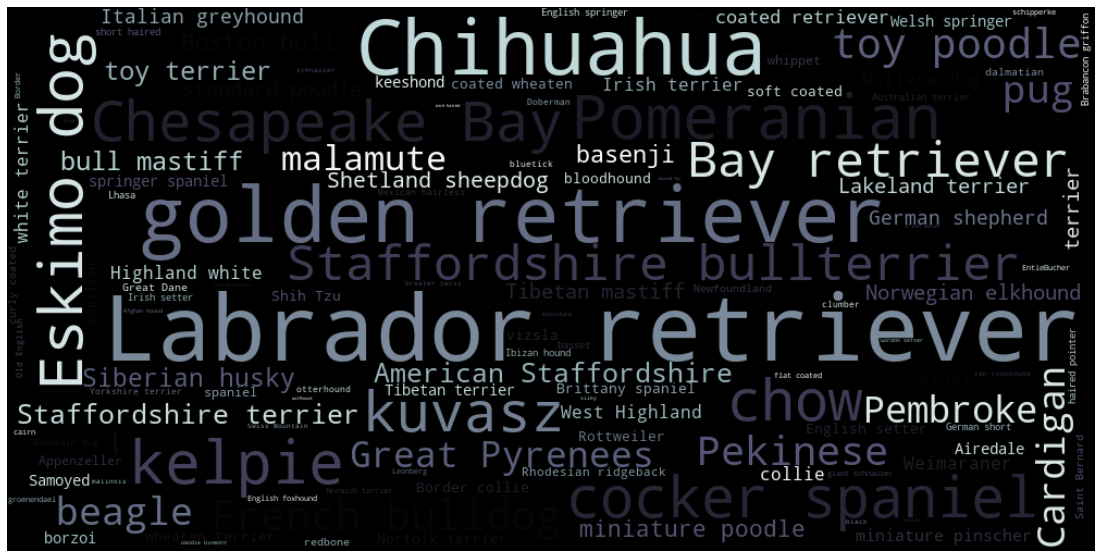

In [126]:
#Word cloud works with a string, so put all the names in a string
unique_string=(" ").join(type_name)
#remove the underscore from the names 
unique_string = unique_string.replace("_"," ")

#Make the word cloud
wordcloud = WordCloud(width = 1000, height = 500,background_color ='black',colormap = 'bone', stopwords = STOPWORDS).generate(str(unique_string));

#plot it 
fig = plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()
wordcloud.to_file("dogtype.png")

In [127]:
#take dog names
dog_name = df_merged['name']

In [128]:
#Remove NaN from names
dog_name = [i for i in dog_name if str(i) != 'nan']

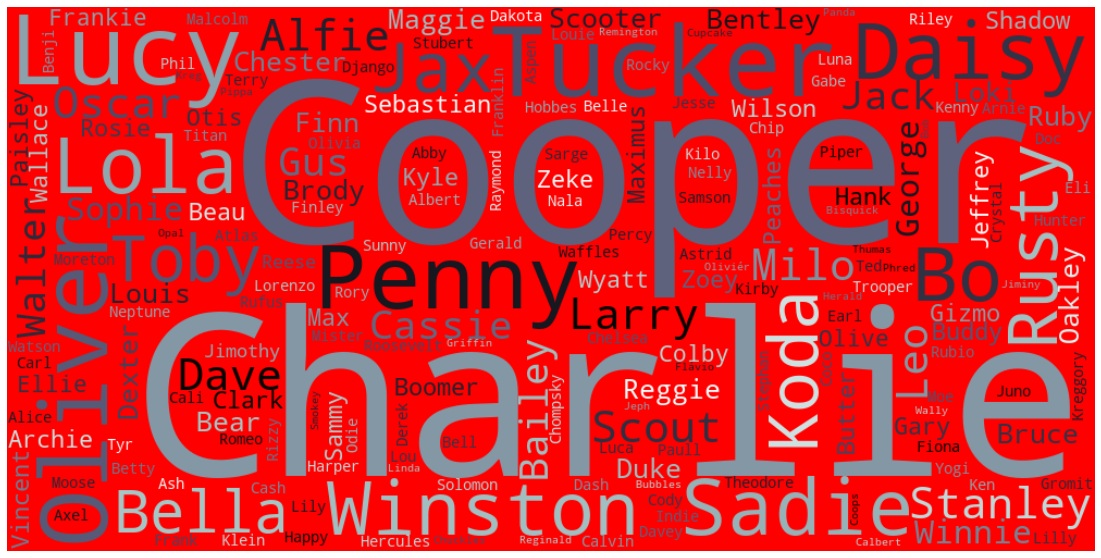

In [129]:
unique_string_2=(" ").join(dog_name)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='red',colormap = 'bone', stopwords = STOPWORDS).generate(str(unique_string_2));

fig = plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()
wordcloud.to_file("dogname.png")

(0, 30000)

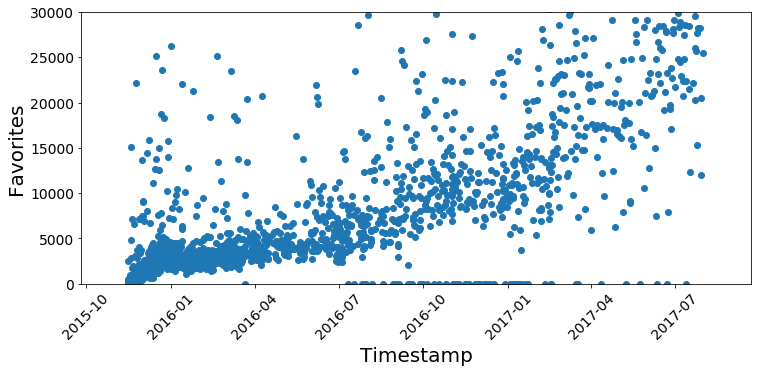

In [130]:
#Code scatter plot for favorites against time
df_merged['timestamp'] = pd.to_datetime(df_merged['timestamp'])
fig = plt.figure(figsize=(12,5))
plt.scatter(data = df_merged, x = 'timestamp', y = 'favorite_count' );
plt.xlabel('Timestamp', fontsize=20)
plt.xticks(rotation = 45, fontsize = 14)
plt.ylabel('Favorites', fontsize=20)
plt.yticks( fontsize = 14);
plt.ylim(0,30000)

(0, 10000)

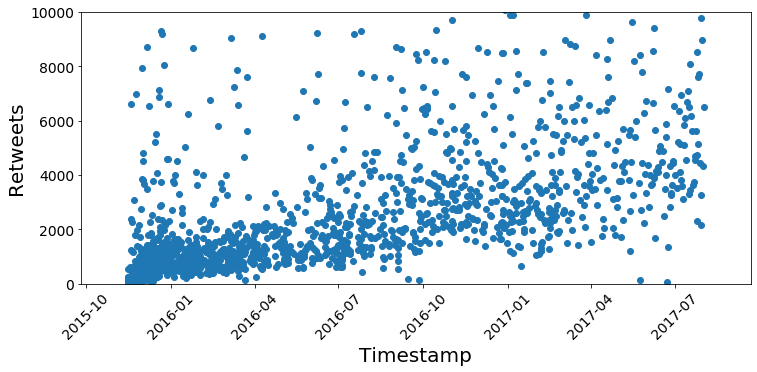

In [131]:
#Scatter plot for retweets against time
df_merged['timestamp'] = pd.to_datetime(df_merged['timestamp'])
fig = plt.figure(figsize=(12,5))
plt.scatter(data = df_merged, x = 'timestamp', y = 'retweet_count' );
plt.xlabel('Timestamp', fontsize=20)
plt.xticks(rotation = 45, fontsize = 14)
plt.ylabel('Retweets', fontsize=20)
plt.yticks( fontsize = 14);
plt.ylim(0,10000)

# Insights
- The most common types of Dogs are Chihuahua, Labrador, Retriver,Pormeranian
- The most common dog names are Charlie, Cooper,Lucy, Tucker
- The scatter plots were set to limits to reduce outliers and in both sets of plots there's a positive correlation. This coul be due to the amount of twitter users increasing over the years

><b>Resources</b>
- https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
- https://pypi.org/project/requests/
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html
- https://www.geeksforgeeks.org/generating-word-cloud-python/
- https://stackoverflow.com/questions/6797984/how-do-i-lowercase-a-string-in-python